<a href="https://colab.research.google.com/github/Anukriti2001/Anukriti/blob/master/SENTIMENT_ANALYSIS_AND_FAKE_REAL_REVIEW_PREDICTION_ON_AMAZON_KINDLE_BOOK_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 29.1 MB/s 


In [ ]:
import pandas as pd
import string as str
import re
import seaborn as sns
import nltk
import spacy
import statistics
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from spellchecker import SpellChecker

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Predictive Analytics Project/all_kindle_review .csv', index_col = 0)
data.head()

,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
#Dimensions of the data
data.shape

(12000, 10)

In [ ]:
#Columns of the data
data.columns

Index(['Unnamed: 0.1', 'asin', 'helpful', 'rating', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [ ]:
#Keeping necessary columns
cols = ['asin', 'helpful', 'rating', 'reviewText','reviewerID', 'reviewerName','unixReviewTime']
data = data[cols]
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,1283385600
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,1381190400
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,1397174400
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,1404518400
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,1356912000


In [ ]:
#Converting Unix timestamp to standard Date and time format
data['unixReviewTime'] = pd.to_datetime(data['unixReviewTime'],unit='s')
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31


In [ ]:
#Separating People who found the reviews useful and the total number of people who voted on the usefulness of the review
data[['Num','Den']]= data['helpful'].str.split(', ', expand=True)
data['Num'] = data['Num'].str.replace('[','').astype(int)
data['Den'] = data['Den'].str.replace(']','').astype(int)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,Num,Den
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02,8,10
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,1
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11,0,0
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,3
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31,0,1


In [ ]:
#Calculating the hepfulness for each review
data['helpful'] = data['Num']/data['Den']
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,Num,Den
0,B0033UV8HI,0.800000,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02,8,10
1,B002HJV4DE,1.000000,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,1
2,B002ZG96I4,NaN,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11,0,0
3,B002QHWOEU,0.333333,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,3
4,B001A06VJ8,0.000000,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31,0,1


In [ ]:
#Dropping the Num and Den columns 
data = data[cols]
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,NaN,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31


EXPLORATORY DATA ANALYSIS
1. Summary Statistics
2. Text Statistics
3. Visualization

Summary Statistics

In [ ]:
#Summary statistics for Books
data['asin'].describe()

count          12000
unique          2114
top       B002AJ7X2C
freq             111
Name: asin, dtype: object

There are 12000 reviews provided. 2114 books have been reviewed. The book with the ID B002AJ7X2C has received a maximum of 111 reviews.

In [ ]:
#Summary statistics for Helpfulness
data['helpful'].describe()

count    6310.000000
mean        0.675571
std         0.370745
min         0.000000
25%         0.500000
50%         0.804613
75%         1.000000
max         1.000000
Name: helpful, dtype: float64

Helpfulness voting was recorded for 6310 reviews which is a  little more than half the total number of reviews. The maximum helpfulness of a review is 1 and the minimum is 0. The average helpfulness of reviews is about 0.675.

In [ ]:
#Summary statistics for Ratings
data['rating'].describe()

count    12000.000000
mean         3.250000
std          1.421619
min          1.000000
25%          2.000000
50%          3.500000
75%          4.250000
max          5.000000
Name: rating, dtype: float64

12000 ratings have been provided. 1 is the least and 5 is highest rating provided. Average ratings of Kindle books cmes out to be 3.25

In [ ]:
#Summary statistics for Review Time
data['reviewerID'].describe()

count             12000
unique             7614
top       A320TMDV6KCFU
freq                125
Name: reviewerID, dtype: object

12000 reviewIDs are present in total. These belong to 7614 people. The reviewer with the ID A320TMDV6KCFU has reviewed the maximum number of books ie. 125.

In [ ]:
#Summary statistics for Reviewers
data['reviewerName'].describe()

count               11962
unique               6735
top       Amazon Customer
freq                  659
Name: reviewerName, dtype: object

There are 11962 reviews with reviewer names provided. 6732 people have reviewed the books. The reviewer 'Amazon Customer' has reviewed the maximum number of books ie. 659.

We can conclude that at most 38 reviewers have not provided their names. There are 7614 IDs but only 6735 names which means some of the reviwers have the same name. 'Amazon Customer' seems to be the name of more than one reviewer as their are 659 books reviewed by this name but the maximum number of reviews by the same reviewer is 125 according to their IDs.

In [ ]:
#Summary statistics for Review Time
data['unixReviewTime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   12000
unique                   1953
top       2013-02-18 00:00:00
freq                       37
first     2000-06-06 00:00:00
last      2014-07-20 00:00:00
Name: unixReviewTime, dtype: object

The dates of 12000 reviews has been recorded out of which reviews were posted on 1953 days. 37 reviews have been posted on 18th February, 2013 which is the highest number of reviews on any day in the recorded interval.
The dataset records reviews for a period of around 14 years starting from 6th June, 2000 to 20th July, 2014.

In [ ]:
data['x'] = 1
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,x
0,B0033UV8HI,0.800000,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02,1
1,B002HJV4DE,1.000000,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1
2,B002ZG96I4,NaN,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1
3,B002QHWOEU,0.333333,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1
4,B001A06VJ8,0.000000,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31,1


In [ ]:
#Number of reviews per day
day = data.groupby(pd.Grouper(key='unixReviewTime', freq='1D')).sum()
day = day['x']
day

unixReviewTime
2000-06-06    1
2000-06-07    0
2000-06-08    0
2000-06-09    0
2000-06-10    0
             ..
2014-07-16    6
2014-07-17    2
2014-07-18    0
2014-07-19    1
2014-07-20    1
Freq: D, Name: x, Length: 5158, dtype: int64

In [ ]:
day.describe()

count    5158.000000
mean        2.326483
std         4.155645
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        37.000000
Name: x, dtype: float64

There are days on which no reviews have been recorded. The maximum number of reviews recorded on a day is 37. On an average, 2 reviews are recorded per day. These statistics hold true for 5158 days.

****************

In [ ]:
#Number of reviews per month
month = data.groupby(pd.Grouper(key='unixReviewTime', freq='1M')).sum()
month = month['x']
month

unixReviewTime
2000-06-30      1
2000-07-31      0
2000-08-31      0
2000-09-30      0
2000-10-31      0
             ... 
2014-03-31    292
2014-04-30    260
2014-05-31    269
2014-06-30    251
2014-07-31    123
Freq: M, Name: x, Length: 170, dtype: int64

In [ ]:
month.describe()

count    170.000000
mean      70.588235
std      112.524322
min        0.000000
25%        0.000000
50%        1.000000
75%      119.750000
max      494.000000
Name: x, dtype: float64

*************

There are months in which no reviews have been recorded. The maximum number of reviews recorded in a month is 494. On an average, 70 reviews are recorded per month. These statistics hold true for 170 months.

In [ ]:
#Number of reviews per year
year = data.groupby(pd.Grouper(key='unixReviewTime', freq='1Y')).sum()
year = year['x']
year

unixReviewTime
2000-12-31       1
2001-12-31       1
2002-12-31       1
2003-12-31       0
2004-12-31       0
2005-12-31       2
2006-12-31       3
2007-12-31      15
2008-12-31     141
2009-12-31     425
2010-12-31    1082
2011-12-31    1854
2012-12-31    2495
2013-12-31    4144
2014-12-31    1836
Freq: A-DEC, Name: x, dtype: int64

In [ ]:
year.describe()

count      15.000000
mean      800.000000
std      1252.923553
min         0.000000
25%         1.000000
50%        15.000000
75%      1459.000000
max      4144.000000
Name: x, dtype: float64

There are years in which no reviews have been recorded. The maximum number of reviews recorded in a year is 4144. On an average, 800 reviews are recorded per day. These statistics hold true for 15 years.

***********

In [ ]:
#Number of reviews per person
person = data.groupby(['reviewerID']).sum()
person = person['x']
person

reviewerID
A0089401235VSN3Z6F3HK    1
A0099735VDZ3HDCAAYKL     4
A025153932FWH3GPV46I1    2
A026598010DVEJLSZ7H2U    2
A027216626S6GHZAIP80D    2
                        ..
AZWOQXRCS1WA6            1
AZY0ZLZHJYTSE            1
AZZ26WCXRPFJX            1
AZZINZCFEEUVC            1
AZZPTYC0F6FWA            2
Name: x, Length: 7614, dtype: int64

In [ ]:
person.describe()

count    7614.000000
mean        1.576044
std         2.332120
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       125.000000
Name: x, dtype: float64

*********

Each reviewer has reviewed at least 1 book. The maximum number of reviews by a single reviewer is 125. On an average, each reviewer has given 1 to 2 reviews. 7614 reviewers have been recorded.

In [ ]:
#Dropping the extra column
data = data.drop(['x'], axis = 1)
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,NaN,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31


Text Statistics

In [ ]:
cols = []
sts = pd.DataFrame(columns = cols)

In [ ]:
#Number of characters in each review
sts['num_of_chars'] = data['reviewText'].str.len()

In [ ]:
#Number of words in each review
sts['num_of_words'] = data['reviewText'].str.split().map(lambda x: len(x))

In [ ]:
#Number of sentences in each review
sts['num_of_sentences'] = data['reviewText'].str.split(".").map(lambda x: len(x))

In [ ]:
#Number of punctuations in each review
sts['num_of_punctuation'] = data['reviewText'].apply(lambda x : len([a for a in x if a in str.punctuation]))

In [ ]:
#Word Density in each review
sts['word_density'] = sts['num_of_words'] / (sts['num_of_chars'] + 1)

In [ ]:
#Density of sentences in each review
sts['sentence_density'] = sts['num_of_sentences'] / (sts['num_of_words'] + 1)

In [ ]:
#Approximate word length in each review
sts['word_length'] = sts['num_of_chars'] / (sts['num_of_words'])

In [ ]:
sts.head()

,num_of_chars,num_of_words,num_of_sentences,num_of_punctuation,word_density,sentence_density,word_length
0,2921,541,28,87,0.185147,0.051661,5.399261
1,371,69,6,12,0.185484,0.085714,5.376812
2,416,76,6,19,0.182254,0.077922,5.473684
3,336,54,5,8,0.160237,0.090909,6.222222
4,90,20,1,0,0.219780,0.047619,4.500000


In [ ]:
sts.describe()

,num_of_chars,num_of_words,num_of_sentences,num_of_punctuation,word_density,sentence_density,word_length
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,601.562750,109.236833,8.347417,17.811167,0.184709,0.098232,5.425920
std,710.158377,126.094610,7.965206,22.945178,0.014251,0.060733,0.426775
min,7.000000,1.000000,1.000000,0.000000,0.100000,0.006289,3.500000
25%,170.750000,32.000000,4.000000,5.000000,0.175580,0.063492,5.150000
50%,332.000000,62.000000,6.000000,10.000000,0.184100,0.085714,5.415057
75%,737.000000,135.000000,10.000000,22.000000,0.193360,0.117647,5.679783
max,12246.000000,2156.000000,141.000000,370.000000,0.254335,2.476190,9.350000


On an average, each review consists of 601 characters. The shortest review has 
just 7 characters and the longest has as much as 12246 characters. 
On an average, each review consists of 109 words. The shortest review has just 1 word and the longest has as much as 2156 words.
On an average, each review consists of 8 sentences. The shortest review has just 1 sentence and the longest has as much as 141 sentences. On an average, each review consists of 17 punctuations. There is atleast one review that does not have any punctuation mark and the some reviews have as much as 370 punctuations. 

The least word density is 0.1 and the maximum is 0.254. The mean word density is 0.184. The smallest word is at least 3 characters and the longest word has about 9 characters. The average word length is about characters. The least sentence density in a review is 0.006 and the maximum is 2.476. The mean sentence density is 0.098

In [ ]:
#Top unigrams
def get_top_n_words(corpus, n=None):
    vectors = CountVectorizer().fit(corpus)
    words = vectors.transform(corpus)
    num_of_words = words.sum(axis=0) 
    words_frequency = [(word, num_of_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

In [ ]:
#List of top 20 unigrams
most_common_words = get_top_n_words(data['reviewText'], 20)
top_uni = pd.DataFrame(most_common_words, columns = ['reviewText' , 'count'])
top_uni

,reviewText,count
0,the,67071
1,and,39629
2,to,35971
3,of,27091
4,it,23727
5,is,20258
6,this,19550
7,was,17615
8,in,17280
9,that,16502


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vectors = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    words = vectors.transform(corpus)
    num_of_words = words.sum(axis=0) 
    words_frequency = [(word, num_of_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

In [ ]:
most_common_words = get_top_n_bigram(data['reviewText'], 20)
top_bi = pd.DataFrame(most_common_words, columns = ['reviewText' , 'count'])
top_bi

,reviewText,count
0,of the,6584
1,this book,5058
2,in the,4685
3,the story,3814
4,it was,3768
5,the book,3018
6,to be,2768
7,and the,2746
8,to the,2664
9,this is,2377


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vectors = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    words = vectors.transform(corpus)
    num_of_words = words.sum(axis=0) 
    words_frequency = [(word, num_of_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

In [ ]:
#Top 20 trigrams
most_common_words = get_top_n_trigram(data['reviewText'], 20)
top_tri = pd.DataFrame(most_common_words, columns = ['ReviewText' , 'count'])
top_tri

,ReviewText,count
0,of the book,664
1,this book was,639
2,of the story,524
3,this book is,512
4,one of the,471
5,in the series,412
6,in this book,409
7,the story was,382
8,this is the,373
9,the story is,353


Visualization

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

iplot([go.Scatter(x=data.head(1000)['rating'], y=data.head(1000)['helpful'], mode='markers')])

This chart is fully interactive. We can use the toolbar on the top-right to perform various operations on the data: zooming and panning, for example. When we hover over a data point.

In [ ]:
iplot([go.Histogram2dContour(x=data.head(500)['rating'], 
                             y=data.head(500)['helpful'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=data.head(1000)['rating'], y=data.head(1000)['helpful'], mode='markers')])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



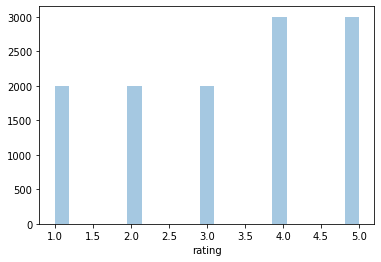

In [ ]:
# Histogram 
sns.distplot(a=data['rating'], kde=False)

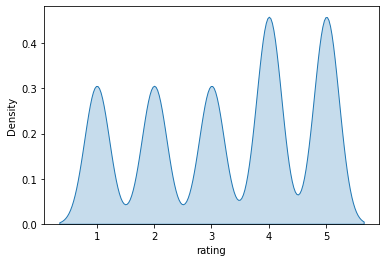

In [ ]:
# KDE plot 
sns.kdeplot(data=data['rating'], shade=True)

In [ ]:
from textblob import TextBlob
import plotly
import plotly.graph_objects as go
data['polarity'] = data['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = data.loc[data.polarity == 1, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -0.97500000000000009, ['Review Text']].sample(2).values
for c in cl:
    print(c[0])

data['polarity'].iplot(
    kind='hist',
    bins=50
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution'
)

data['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution'
)

data['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution'
)

DATA PREPROCESSING
1. Checking for null and empty values
2. Checking for duplicates
3. Lower casing
4. Removal of URLs
5. Removal of Numbers
6. Removal of Special Characters
7. Expanding Contractions
8. Tokenization
9. Removal of punctuations
10. Removal of extra whitespaces
11. Removal of stopwords
12. Stemming
13. Lemmatization
14. Spelling correction

Checking for null and empty values

In [ ]:
data.isnull().sum()

There are missing values in helpfulness of the ratings attribute and some reviewers have preferred not to give their names.
The helpfulness values are NaN because people have not voted for the reviews thus having denominator as zero. These values will be replaced by 0.
The missing names will be replaced by 'Anonymous'.

In [ ]:
#Filling the missing helpfulness ratings with zero.
data['helpful'] = data['helpful'].fillna(0)
#Filling the missing reviewer names as 'Anonymous'
data['reviewerName'] = data['reviewerName'].fillna('Anonymous')

In [ ]:
data.isnull().sum()

In [ ]:
data

Checking for Duplicates

In [ ]:
data.duplicated().sum()

0

There are no duplicate rows in the dataframe.

Lower Casing

In [ ]:
data['reviewText'] = data['reviewText'].str.lower()
data.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"jace rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read. i didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,i'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31


Removal of URLs

In [ ]:
url = re.compile(r'https?://\S+|www\.\S+')
data['reviewText'].str.contains(url)

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Name: reviewText, Length: 12000, dtype: bool

In [ ]:
data

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"jace rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read. i didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,i'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31
...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentine cupid is a vampire- jena and ian ano...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28
11996,B002JCSFSQ,1.000000,5,i have read all seven books in this series. ap...,AQRSPXLNEQAMA,TerryLP,2011-05-16
11997,B0035N1V7K,0.000000,3,this book really just wasn't my cuppa. the si...,A2T5QLT5VXOJAK,hwilson,2013-07-26
11998,B001W1XT40,0.500000,1,"tried to use it to charge my kindle, it didn't...",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17


In [ ]:
data['reviewText'].replace(url,'', regex=True, inplace = True)

In [ ]:
data

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"jace rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read. i didn't want to put it dow...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,i'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31
...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentine cupid is a vampire- jena and ian ano...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28
11996,B002JCSFSQ,1.000000,5,i have read all seven books in this series. ap...,AQRSPXLNEQAMA,TerryLP,2011-05-16
11997,B0035N1V7K,0.000000,3,this book really just wasn't my cuppa. the si...,A2T5QLT5VXOJAK,hwilson,2013-07-26
11998,B001W1XT40,0.500000,1,"tried to use it to charge my kindle, it didn't...",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17


Removal of Numbers

In [ ]:
data['reviewText'].replace(r'(\d)+','', regex=True, inplace = True)

Removal of Special Characters

In [ ]:
data['reviewText'].replace(r'[@#$%&*]','', regex=True, inplace = True)

Expanding Contractions

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))

In [ ]:
def expand_contractions(s, contractions_dict=contractions):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

In [ ]:
for i in range(0,12000):
  data['reviewText'][i] = expand_contractions(data['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"jace rankin may be short, but he is nothing to...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read. i did not want to put it do...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,i shall start by saying this is the first of f...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Rjostler,2012-12-31
...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentine cupid is a vampire- jena and ian ano...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28
11996,B002JCSFSQ,1.000000,5,i have read all seven books in this series. ap...,AQRSPXLNEQAMA,TerryLP,2011-05-16
11997,B0035N1V7K,0.000000,3,this book really just was not my cuppa. the s...,A2T5QLT5VXOJAK,hwilson,2013-07-26
11998,B001W1XT40,0.500000,1,"tried to use it to charge my kindle, it did no...",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17


Removal of Punctuations

In [ ]:
for i in range(0,12000):
  data['reviewText'][i]=re.sub("[$@&/'.{}\[\],-:;?!())\"]","",data['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data

Removal of extra whitespaces

In [ ]:
spaces = r'^\s*|\s\s*'
for i in range(0,12000):
  data['reviewText'][i] = re.sub(spaces, ' ', data['reviewText'][i]).strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.head()

Tokenization

In [ ]:
df = data

In [ ]:
for i in range(0,12000):
  df['reviewText'][i] = nltk.word_tokenize(df['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,"[jace, rankin, may, be, short, but, he, is, no...",A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,"[great, short, read, i, did, not, want, to, pu...",A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,"[i, shall, start, by, saying, this, is, the, f...",A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,"[aggie, is, angela, lansbury, who, carries, po...",AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,"[i, did, not, expect, this, type, of, book, to...",A3C9V987IQHOQD,Rjostler,2012-12-31


Removal of Stopwords

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
stop_words.remove('not')

In [ ]:
def remove_stopwords(text):
    t = [token for token in df['reviewText'][i] if token.lower() not in stop_words]
    text = ' '.join(t)    
    return text

In [ ]:
for i in range(0,12000):
  df['reviewText'][i] = remove_stopwords(df['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,jace rankin may short nothing mess man hauled ...,A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read not want put read one sitting...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,shall start saying first four books not expect...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggie angela lansbury carries pocketbooks inst...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,not expect type book library pleased find pric...,A3C9V987IQHOQD,Rjostler,2012-12-31


Stemming

In [ ]:
def stem(text):
  stemmer = nltk.porter.PorterStemmer()
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text

In [ ]:
for i in range(0,12000):
  df['reviewText'][i] = stem(df['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,not expect type book librari pleas find price ...,A3C9V987IQHOQD,Rjostler,2012-12-31


Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
for i in range(0,12000):
  df['reviewText'][i] = " ".join([lemmatizer.lemmatize(word) for word in df['reviewText'][i].split()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31


Spelling Correction

In [ ]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
for i in range(0,12000):
  df['reviewText'][i] = correct_spellings(df['reviewText'][i])

In [ ]:
df.head()

FEATURE EXTRACTION
1. Bag-of-Words (BoW) Model
2. Term Frequency - Inverse Document Frequency(TF-IDF)

Bag-of-Words Model

In [ ]:
df_try = df

In [ ]:
from keras.preprocessing.text import Tokenizer
 

# using tokenizer 
model = Tokenizer()
model.fit_on_texts(df['reviewText'])
#create bag of words representation 
rep = model.texts_to_matrix(df['reviewText'], mode='count')
print(rep)

[[0. 7. 4. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 2. 3. ... 0. 0. 0.]
 ...
 [0. 3. 2. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 1.]]


Term Frequency - Inverse Document Frequency(TF-IDF)

In [ ]:
! pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 2.9 MB/s 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
list_cols = ['rating']

ce_oe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df_session_ce_ordinal = ce_oe.fit_transform(df)

df_session_ce_ordinal.tail()

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
11995,B001DUGORO,0.000000,3,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28
11996,B002JCSFSQ,1.000000,2,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16
11997,B0035N1V7K,0.000000,1,book realli wasnt cuppa situat man captur woma...,A2T5QLT5VXOJAK,hwilson,2013-07-26
11998,B001W1XT40,0.500000,5,tri use charg kindl didnt even regist charg co...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17
11999,B003370JUS,0.833333,1,take instruct look often hidden world sexual b...,A3JUXLB4K9ZXCC,Dafna Yee,2012-07-05


In [ ]:
vec_tfidf = TfidfVectorizer()
X = vec_tfidf.fit_transform(df_session_ce_ordinal.reviewText)
Y = df_session_ce_ordinal.rating

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

SENTIMENT ANALYSIS
1. Naive Bayes
2. K Neighours Classifier 
3. Linear Regression

Naive Bayes

Classifying reviews with 3,4,5 as ratings as 1 for positive reviews and the reviews with 1,2 as ratings as 0 for negative reviews

In [ ]:
df_try

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31
...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17


In [ ]:
import numpy as np

In [ ]:
df_try['label'] = np.where(df_try['rating']>2, 1, 0)

In [ ]:
df_try

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1
...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0


In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x = df_try['reviewText']
y = df_try['label']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
x_test

6258     ethan highschool mate friend year school insep...
11651    stori start littl slow snowbal page turner wel...
2810     fun stori everyth like paranorm suspens type s...
6857     main charact tell stori man femal author made ...
10054    introduct fairli smooth regrett becam rush sti...
                               ...                        
9038     storylin uniqu not go plot other describ not l...
2364     sex idol materi strut stuff stage turn audienc...
10858    blur night awesom readit touch everi emotioni ...
2071     fantasi lover tire old stori done diff cover s...
2916     anoth great stori hill love charact could not ...
Name: reviewText, Length: 3000, dtype: object

In [ ]:
x

5025     short short uh storya woman supposedli tri win...
6438     read review book date confus say least also re...
9864     hate give book low rate base technolog flaw in...
7643     book seem follow plot line romant comedi movi ...
1355     true classic not like movi fight larg dinosaur...
                               ...                        
2663     dollar sampl includ femal lead love vaughn sto...
11572    oh gosh wasnt one bore there premis endeavour ...
8433     enjoy stori much john carter mar seri read twi...
6974     one wonder peopl surviv condit stress live dai...
3138     rubi halloway issu appear like woman selfconsc...
Name: reviewText, Length: 9000, dtype: object

In [ ]:
y

5025     0
6438     1
9864     0
7643     1
1355     1
        ..
2663     1
11572    0
8433     1
6974     1
3138     1
Name: label, Length: 9000, dtype: int64

In [ ]:
y_test

6258     1
11651    1
2810     1
6857     0
10054    0
        ..
9038     1
2364     1
10858    1
2071     1
2916     1
Name: label, Length: 3000, dtype: int64

In [ ]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [ ]:
model.score(x,y)

0.9112222222222223

In [ ]:
predictions = model.predict(x_test)

In [ ]:
pred_df = pd.DataFrame(list(zip(x_test, y_test, predictions)), columns = ['Reviews', 'Actual class','Predicted class'])
pred_df

,Reviews,Actual class,Predicted class
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1


In [ ]:
pred_df['Predicted class'] = np.where(pred_df['Predicted class'] == 1, 'Positive', 'Negative')
pred_df['Actual class'] = np.where(pred_df['Actual class'] == 1, 'Positive', 'Negative')
pred_df

,Reviews,Actual class,Predicted class
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Negative,Negative
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Negative,Negative
...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Negative
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Positive,Positive


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_df['Actual class'], pred_df['Predicted class'])
tn, fp, fn, tp = confusion_matrix(pred_df['Actual class'], pred_df['Predicted class']).ravel()
(tn, fp, fn, tp)

(683, 317, 193, 1807)

Text(91.68, 0.5, 'Predicted')

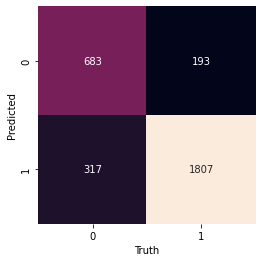

In [ ]:
from matplotlib import pyplot as plt
mat = confusion_matrix(predictions, y_test)
names = np.unique(predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')


Recall

In [ ]:
recall_nb = tp/(tp + fn)
recall_nb

0.9035

Precision

In [ ]:
precision_nb = tp/(tp + fp)
precision_nb

0.85075329566855

Accuracy

In [ ]:
accuracy_nb = (tp + fn)/(tp + fn + fp + fn)
accuracy_nb

0.796812749003984

F score

In [ ]:
f1_nb = 2* precision_nb * recall_nb/(precision_nb + recall_nb)
f1_nb

0.876333656644035

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knc = KNeighborsClassifier(n_neighbors=19)
knc.fit(x, y)
Y_pred = knc.predict(x_test)
score = knc.score(x_test, y_test)

In [ ]:
#Check this
pred_df = pd.DataFrame(list(zip(x_test, y_test, Y_pred)), columns = ['Reviews', 'Actual class', 'Predicted class'])
pred_df

,Reviews,Actual class,Predicted class
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred_df['Actual class'], pred_df['Predicted class']).ravel()
(tn, fp, fn, tp)

(178, 822, 103, 1897)

Text(91.68, 0.5, 'Predicted')

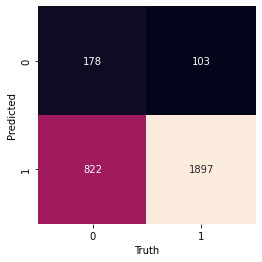

In [ ]:
from matplotlib import pyplot as plt
mat = confusion_matrix(Y_pred, y_test)
names = np.unique(predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Recall

In [ ]:
recall_knn = tp/(tp + fn)
recall_knn

0.9485

Precision

In [ ]:
precision_knn = tp/(tp + fp)
precision_knn

0.697682971680765

Accuracy

In [ ]:
accuracy_knn = (tp + fn)/(tp + fn + fp + fn)
accuracy_knn

0.6837606837606838

F score

In [ ]:
f1_knn = 2* precision_knn * recall_knn/(precision_knn + recall_knn)
f1_knn

0.8039838948929858

Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df_try

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1
...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0


In [ ]:
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x_test)

In [ ]:
lr.score(x,y)

0.9938625920409934

In [ ]:
#Check this
pred_df = pd.DataFrame(list(zip(x_test, y_test, y_pred)), columns = ['Reviews', 'Actual class', 'Predicted class'])
pred_df

,Reviews,Actual class,Predicted class
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,-9.047047e+09
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1.257777e+09
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,-3.296891e+09
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2.187275e+10
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,-1.447214e+09
...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3.129335e+09
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,-9.960398e+08
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,8.567251e+09
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1.271886e+09


In [ ]:
pred_df.dtypes

Reviews            object
Actual class        int64
Predicted class    object
dtype: object

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_df['Actual class'], pred_df['Predicted class'])
tn, fp, fn, tp = confusion_matrix(pred_df['Actual class'], pred_df['Predicted class']).ravel()
(tn, fp, fn, tp)

In [ ]:
from matplotlib import pyplot as plt
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Recall

In [ ]:
recall_lr = tp/(tp + fn)
recall_lr

0.9025

Precision

In [ ]:
precision_lr = tp/(tp + fp)
precision_lr

0.8502119642016015

Accuracy

In [ ]:
accuracy_lr = (tp + fn)/(tp + fn + fp + fn)
accuracy_lr

0.7958615200955034

F score

In [ ]:
f1_lr = 2* precision_lr * recall_lr/(precision_lr + recall_lr)
f1_lr

0.8755760368663594

PERFORMANCE COMPARISION

In [ ]:
# initialize list of lists
eval = [[recall_nb, recall_nb, recall_knn], [precision_nb, precision_nb , precision_knn], [accuracy_nb, accuracy_nb , accuracy_knn], [f1_nb, f1_nb ,f1_knn]]
 
# Create the pandas DataFrame
eval_df = pd.DataFrame(eval, columns = ['Naive Bayes', 'Linear Regression', 'KNN'])

In [ ]:
eval_df

,Naive Bayes,Linear Regression,KNN
0,0.903500,0.903500,0.948500
1,0.850753,0.850753,0.697683
2,0.796813,0.796813,0.683761
3,0.876334,0.876334,0.803984


FAKE/REAL REVIEW PREDICTION
1. Text Statistics
2. Naive Bayes
3. Logistic Regression
4. K-Nearest Neighbors

Text Statistics

In [ ]:
import numpy as np

Drawing conclusion from length of each review

In [ ]:
#Review length
sts['num_of_words'].describe()

count    12000.000000
mean       109.236833
std        126.094610
min          1.000000
25%         32.000000
50%         62.000000
75%        135.000000
max       2156.000000
Name: num_of_words, dtype: float64

In [ ]:
# Z score
from scipy import stats
z = np.abs(stats.zscore(sts['num_of_words']))
df['Real/fake class 1'] = np.where(z>3, 'Fake', 'Real')
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,Fake
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,Real
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,Real
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,Real
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,Real
...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,Real
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,Real
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,Real
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,Real


Fake reviews tend to be extremely short or extremely large. Here we have classified the reviews as fake if the review length is an outlier on both both short and long side. Outliers are taken to be those values whose absolute z-score value is greater than 3  

In [ ]:
#Number of unique words
from collections import Counter

In [ ]:
def count_words_fast(text):    
    text = text.lower()
    skips = [".", ", ", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

In [ ]:
words = []
for i in range(0,12000):
  words.append(count_words_fast(df['reviewText'][i]))

In [ ]:
def word_stats(word_counts):     
    num_unique = len(word_counts)
    counts = word_counts.values()
    return num_unique

In [ ]:
unique = []
for i in range(0,12000):
  unique.append(word_stats(words[i]))

In [ ]:
unique = pd.DataFrame(unique)
unique.describe()

,0
count,12000.000000
mean,43.596167
std,44.173958
min,1.000000
25%,15.000000
50%,27.000000
75%,55.000000
max,635.000000


In [ ]:
z = np.abs(stats.zscore(unique))
df['Real/fake class 2'] = np.where(z>3, 'Fake', 'Real')
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1,Real/fake class 2
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,Fake,Fake
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,Real,Real
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,Real,Real
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,Real,Real
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,Real,Real
...,...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,Real,Real
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,Real,Real
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,Real,Real
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,Real,Real


Fake reviews tend to have limited vocabulary. Here we have classified the reviews as fake if the number of unique words in the review is an outlier having an absolute z-score value greater than 3  

In [ ]:
#Highest or least rating
df['Real/fake class 3'] = np.where(np.logical_or(df['rating'] == 5, df['rating'] == 1), 'Fake', 'Real')
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1,Real/fake class 2,Real/fake class 3
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,Fake,Fake,Real
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,Real,Real,Fake
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,Real,Real,Real
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,Real,Real,Real
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,Real,Real,Real
...,...,...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,Real,Real,Real
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,Real,Real,Fake
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,Real,Real,Real
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,Real,Real,Fake


Fake reviews tend to give either 5 as rating for advertising or 1 as rating for making the product unpopular. Here we have the classified the reviews with ratings 1 and 5 as fake.

In [ ]:
df['Real/fake class 1'] = np.where(df['Real/fake class 1'] == 'Real', 1 , 0)
df['Real/fake class 2'] = np.where(df['Real/fake class 2'] == 'Real', 1 , 0)
df['Real/fake class 3'] = np.where(df['Real/fake class 3'] == 'Real', 1 , 0)

In [ ]:
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1,Real/fake class 2,Real/fake class 3
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,0,0,1
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,1,1,0
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,1,1,1
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,1,1,1
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,1,1,1
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,1,1,0
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,1,1,1
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,1,1,0


In [ ]:
cols = ['Real/fake class 1', 'Real/fake class 2', 'Real/fake class 3']
mode_s = df[cols]
mode_s.head()

,Real/fake class 1,Real/fake class 2,Real/fake class 3
0,0,0,1
1,1,1,0
2,1,1,1
3,1,1,1
4,1,1,1


In [ ]:
x = mode_s.mode(axis = 1)
x[0]

0        0
1        1
2        1
3        1
4        1
        ..
11995    1
11996    1
11997    1
11998    1
11999    1
Name: 0, Length: 12000, dtype: int64

In [ ]:
df['Final Real/Fake Prediction based on statistics'] = x[0]
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1,Real/fake class 2,Real/fake class 3,Final Real/Fake Prediction based on statistics
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,0,0,1,0
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,1,1,0,1
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,1,1,1,1
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,1,1,1,1
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,1,1,1,1
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,1,1,0,1
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,1,1,1,1
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,1,1,0,1


In [ ]:
df['Final Real/Fake Prediction based on statistics'] = np.where(df['Final Real/Fake Prediction based on statistics'] == 1, 'Real' , 'Fake')

In [ ]:
df

,asin,helpful,rating,reviewText,reviewerID,reviewerName,unixReviewTime,label,Real/fake class 1,Real/fake class 2,Real/fake class 3,Final Real/Fake Prediction based on statistics
0,B0033UV8HI,0.800000,3,jace rankin may short noth mess man haul saloo...,A3HHXRELK8BHQG,Ridley,2010-09-02,1,0,0,1,Fake
1,B002HJV4DE,1.000000,5,great short read not want put read one sit sex...,A2RGNZ0TRF578I,Holly Butler,2013-10-08,1,1,1,0,Real
2,B002ZG96I4,0.000000,3,shall start say first four book not expect con...,A3S0H2HV6U1I7F,Merissa,2014-04-11,1,1,1,1,Real
3,B002QHWOEU,0.333333,3,aggi angela lansburi carri pocketbook instead ...,AC4OQW3GZ919J,Cleargrace,2014-07-05,1,1,1,1,Real
4,B001A06VJ8,0.000000,4,not expect type book librari plea find price r...,A3C9V987IQHOQD,Rjostler,2012-12-31,1,1,1,1,Real
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,B001DUGORO,0.000000,4,valentin cupid vampir jena ian anoth vampir fi...,A1OKS5Q1HD8WQC,lisa jon jung,2014-02-28,1,1,1,1,Real
11996,B002JCSFSQ,1.000000,5,read seven book seri apocalypticadventur one f...,AQRSPXLNEQAMA,TerryLP,2011-05-16,1,1,1,0,Real
11997,B0035N1V7K,0.000000,3,book realli not cuppa situat man captur woman ...,A2T5QLT5VXOJAK,hwilson,2013-07-26,1,1,1,1,Real
11998,B001W1XT40,0.500000,1,tri use charg kindl not even regist charg comp...,A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",2013-09-17,0,1,1,0,Real


In [ ]:
plt.bar(df['Final Real/Fake Prediction based on statistics'], df['rating'], color ='blue',
        width = 0.4)
 
plt.xlabel("Fake/Real")
plt.ylabel("Rating")

plt.show()

Naive Bayes

In [ ]:
X = df['reviewText'].values
y = df['rating'].values
x, x_test, y, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=42)
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([4, 5, 4, ..., 4, 4, 3])

In [ ]:
pred_df = pd.DataFrame(list(zip(x_test, y_test, predictions, abs(y_test-predictions), df['Final Real/Fake Prediction based on statistics'])), columns = ['Reviews', 'Actual rating', 'Predicted rating', 'Difference', 'Final Real/Fake Prediction based on statistics'])
pred_df

,Reviews,Actual rating,Predicted rating,Difference,Final Real/Fake Prediction based on statistics
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,5,2,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,5,2,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,1,Real
...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,5,1,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real


In [ ]:
from scipy import stats
z = np.abs(stats.zscore(pred_df['Difference']))
pred_df['Real/fake class 5'] = np.where(z>3, 'Fake', 'Real')
pred_df

,Reviews,Actual rating,Predicted rating,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,5,2,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,5,2,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,1,Real,Real
...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,5,1,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real


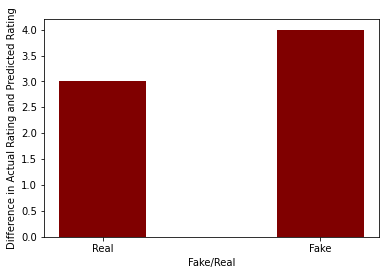

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(pred_df['Real/fake class 5'], pred_df['Difference'], color ='maroon',
        width = 0.4)


plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

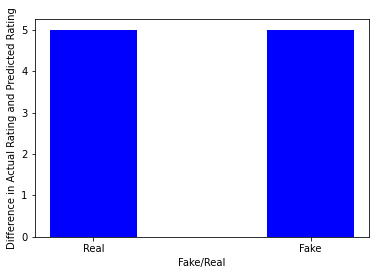

In [ ]:
plt.bar(pred_df['Real/fake class 5'], pred_df['Actual rating'], color ='blue',
        width = 0.4)
 
plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

Logistic Regression

In [ ]:
X = df['reviewText'].values
y = df['rating'].values

In [ ]:
x, x_test, y, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred

array([4, 1, 4, ..., 4, 2, 3])

In [ ]:
pred_df = pd.DataFrame(list(zip(x_test, y_test, y_pred, abs(y_test-y_pred), pred_df['Final Real/Fake Prediction based on statistics'], pred_df['Real/fake class 5'])), columns = ['Reviews', 'Actual rating', 'Predicted rating_LR', 'Difference', 'Final Real/Fake Prediction based on statistics','Real/fake class 5'])
pred_df

,Reviews,Actual rating,Predicted rating_LR,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,Real
...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,Real


In [ ]:
from scipy import stats
z = np.abs(stats.zscore(pred_df['Difference']))
pred_df['Real/fake class 6'] = np.where(z>3, 'Fake', 'Real')
pred_df

,Reviews,Actual rating,Predicted rating_LR,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,Real,Real
...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,Real,Real


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['Real/fake class 6'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

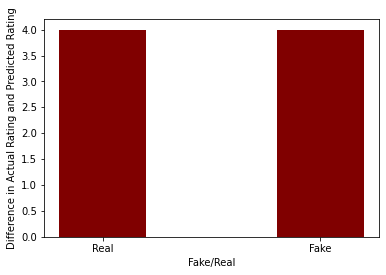

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(pred_df['Real/fake class 6'], pred_df['Difference'], color ='maroon',
        width = 0.4)


plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

In [ ]:
plt.bar(pred_df['Real/fake class 6'], pred_df['Actual rating'], color ='blue',
        width = 0.4)
 
plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

KK Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=19)
knc.fit(x, y)
y_pred = knc.predict(x_test)

In [ ]:
y_pred

array([4, 1, 4, ..., 4, 2, 3])

In [ ]:
pred_df = pd.DataFrame(list(zip(x_test, y_test, y_pred, abs(y_test-y_pred), pred_df['Final Real/Fake Prediction based on statistics'], pred_df['Real/fake class 5'], pred_df['Real/fake class 6'])), columns = ['Reviews', 'Actual rating', 'Predicted ratin_KNN', 'Difference', 'Final Real/Fake Prediction based on statistics','Real/fake class 5', 'Real/fake class 6'])
pred_df

,Reviews,Actual rating,Predicted ratin_KNN,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,Real,Real
...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,Real,Real


In [ ]:
from scipy import stats
z = np.abs(stats.zscore(pred_df['Difference']))
pred_df['Real/fake class 7'] = np.where(z>3, 'Fake', 'Real')
pred_df

,Reviews,Actual rating,Predicted rating_LR,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real,Real,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,Real,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,Real,Real,Real
...,...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,Real,Real,Real


In [ ]:
pred_df = pd.DataFrame(list(zip(x_test, y_test, y_pred, abs(y_test-y_pred), pred_df['Final Real/Fake Prediction based on statistics'], pred_df['Real/fake class 5'], pred_df['Real/fake class 6'], pred_df['Real/fake class 7'])), columns = ['Reviews', 'Actual rating', 'Predicted ratin_KNN', 'Difference', 'Final Real/Fake Prediction based on statistics', 'Real/fake class 5', 'Real/fake class 6', 'Real/fake class 7'])
pred_df

,Reviews,Actual rating,Predicted ratin_KNN,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,Real,Real,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,Real,Real,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,Real,Real,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,Real,Real,Real
...,...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,Real,Real,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,Real,Real,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,Real,Real,Real


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(pred_df['Real/fake class 7'], pred_df['Difference'], color ='maroon',
        width = 0.4)


plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

In [ ]:
plt.bar(pred_df['Real/fake class 7'], pred_df['Actual rating'], color ='blue',
        width = 0.4)
 
plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()

Final Prediction

In [ ]:
pred_df['Real/fake class 5'] = np.where(pred_df['Real/fake class 5'] == 'Real', 1 , 0)
pred_df['Real/fake class 6'] = np.where(pred_df['Real/fake class 6'] == 'Real', 1 , 0)
pred_df['Real/fake class 7'] = np.where(pred_df['Real/fake class 7'] == 'Real', 1 , 0)

In [ ]:
pred_df

,Reviews,Actual rating,Predicted ratin_KNN,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,1,1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,1,1,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,1,1,1
...,...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,1,1,1
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,1,1,1


In [ ]:
cols = ['Final Real/Fake Prediction based on statistics','Real/fake class 5', 'Real/fake class 6', 'Real/fake class 7']
mode_s = pred_df[cols]
mode_s.head()

,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7
0,Fake,1,1,1
1,Real,1,1,1
2,Real,1,1,1
3,Real,1,1,1
4,Real,1,1,1


In [ ]:
x = mode_s.mode(axis = 1)
x[0]

0       1
1       1
2       1
3       1
4       1
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: 0, Length: 3000, dtype: int64

In [ ]:
pred_df['Final Real/Fake Prediction'] = x[0]
pred_df

,Reviews,Actual rating,Predicted ratin_KNN,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7,Final Real/Fake Prediction
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,1,1,1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,1,1,1,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,1,1,1,1
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1,1
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1,1
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,1,1,1,1


In [ ]:
pred_df['Final Real/Fake Prediction'] = np.where(pred_df['Final Real/Fake Prediction'] == 1, 'Real' , 'Fake')

In [ ]:
pred_df

,Reviews,Actual rating,Predicted ratin_KNN,Difference,Final Real/Fake Prediction based on statistics,Real/fake class 5,Real/fake class 6,Real/fake class 7,Final Real/Fake Prediction
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Fake,1,1,1,Real
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1,2,Real,1,1,1,Real
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1,Real
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,4,1,Real,1,1,1,Real
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,2,Real,1,1,1,Real
...,...,...,...,...,...,...,...,...,...
2995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,5,0,Real,1,1,1,Real
2996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1,Real
2997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4,0,Real,1,1,1,Real
2998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,2,Real,1,1,1,Real


In [ ]:
plt.bar(pred_df['Final Real/Fake Prediction'], pred_df['Actual rating'], color ='blue',
        width = 0.4)
 
plt.xlabel("Fake/Real")
plt.ylabel("Difference in Actual Rating and Predicted Rating")

plt.show()